# Communciating Findings: Bay Wheels Data Exploration Project

## By Talal Al-Dawudi

## Investigation Overview

Bay Wheels, formerly known as Ford GoBike, is a bike sharing service operating in San Francisco Bay Area. Using the company's 2019 data, this project aims to gain a deeper understanding of Bay Wheels' operations by assessing patterns in rental behavior and generating useful insights.

## Dataset Overview

Bay Wheels is now owned and operated by Lyft, one of the world's leading ridesharing companies. The bike sharing service had over 2,600 bikes available across 262 stations (2018). The data encompasses data on approximately **2,506,983 rides** for the year 2019.

The data includes:

user type (casual user or subscriber)
duration of trip taken (in seconds)
start station and end station details (including names and coordinates)
the precise start time and end time for each trip.

Other non-key features (for the purposes of my investigation) include the rental access method (app vs. station), and whether they use bike share of all trips.



In [53]:
# Import all packages required for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import os
import glob
import math
from math import radians, sin, cos, acos

In [54]:
#Importing master dataframe (cleaned)
df_clean = pd.read_csv('baywheels19_master_clean.csv')
df_clean.sample(5)

/Users/talaldawudi/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0  duration_sec               start_time  \
1883105     1883105           802  2019-10-14 15:53:16.875   
505302       505302           602  2019-07-22 21:54:42.891   
1775999     1775999           483  2019-10-28 17:36:28.670   
1977759     1977759           200  2019-10-02 08:15:48.406   
588604       588604           154  2019-07-08 18:28:46.096   

                        end_time  start_station_id       start_station_name  \
1883105  2019-10-14 16:06:38.896              58.0     Market St at 10th St   
505302   2019-07-22 22:04:44.969              86.0  Market St at Dolores St   
1775999  2019-10-28 17:44:32.235              25.0      Howard St at 2nd St   
1977759  2019-10-02 08:19:09.343             101.0   15th St at Potrero Ave   
588604   2019-07-08 18:31:20.609             176.0   MacArthur BART Station   

         start_station_latitude  start_station_longitude  end_station_id  \
1883105               37.776619              -122.417385           386.0   
505302                37.769305              -122.426826            58.0   
1775999               37.786928              -122.398113            60.0   
1977759               37.767079              -122.407359           350.0   
588604                37.828410              -122.266315           215.0   

                 end_station_name  end_station_latitude  \
1883105    24th St at Bartlett St             37.752105   
505302       Market St at 10th St             37.776619   
1775999      8th St at Ringold St             37.774520   
1977759      8th St at Brannan St             37.771431   
588604   34th St at Telegraph Ave             37.822547   

         end_station_longitude  bike_id   user_type bike_share_for_all_trip  \
1883105            -122.419724     9901    Customer                      No   
505302             -122.417385     2134    Customer                      No   
1775999            -122.409449     2148  Subscriber                      No   
1977759            -122.405787    10292  Subscriber                      No   
588604             -122.266318     2966  Subscriber                      No   

        rental_access_method  duration_mins  start_hourofday start_dayofweek  \
1883105                  NaN             13               15             Mon   
505302                   NaN             10               21             Mon   
1775999                  NaN              8               17             Mon   
1977759                  NaN              3                8             Wed   
588604                   NaN              2               18             Mon   

        month  
1883105   Oct  
505302    Jul  
1775999   Oct  
1977759   Oct  
588604    Jul

## **Trips by Hour Started**

The hourly rental trends tell us the most about reasons why people use the Bay Wheels service. The usage patterns are as follows:
- **12:00AM - 6:00AM** : The lowest usage period. Most people are asleep, and most businesses are closed.
- **7:00AM - 9:00AM**  : Usage increases dramatically, which can be explained by morning commutes to work for most people.
- **10:00AM - 3:00PM** : Usage drops off dramatically, but there is a steady flow of rentals for these hours. Likely from those running errands, exploring the city, or moving around the city during the day.
- **4:00PM - 6:00PM**  : Usage skyrockets, explained by the afternoon commutes back from work for most people.
- **7:00PM - 12:00AM** : Bike rentals steadily decline from 7pm onwards, and slow down dramatically at 11:00PM.

It is clear that a significant proportion of Bay Wheels users use the service for daily work commutes. However, this is certainly not the service's only use, as demand remains solid at more than 650,000 rides per year between the hours of 10 and 3pm. 

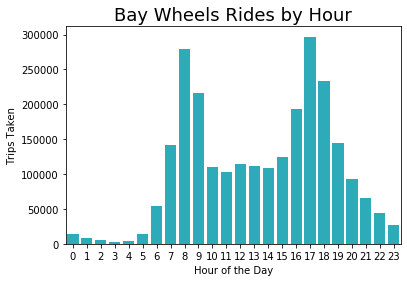

In [55]:
#Aggregating hourly data and grouping by the hour in which a trip was started.
df_hour_agg = pd.DataFrame(df_clean.groupby('start_hourofday').size()).reset_index().rename(columns={0:'count'})
df_hour_agg = df_hour_agg.sort_values(by='count',ascending=False);

#Setting Conditions for Bar Plot
bar_color2 = sb.color_palette()[9]
hour_bar_chart = sb.barplot(data = df_hour_agg, x='start_hourofday',y='count', color = bar_color2)

plt.xlabel("Hour of the Day", size=10)
plt.ylabel("Trips Taken", size=10)
plt.title("Bay Wheels Rides by Hour", size=18);

## **Trips by Day of the Week** 

Usage levels appear to be much higher (and remain relatively steady) during workdays, while demand drops off dramatically on Saturdays and Sundays. 
This signifies that a large amount of Bay Area residents use Bay Wheels as a means to commute to and from work every day, and less so for leisure on the weekends.

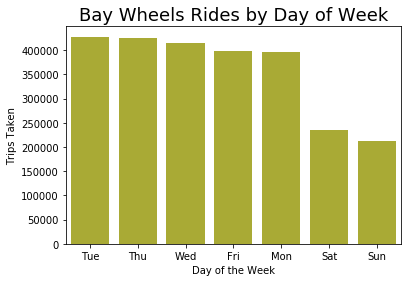

In [56]:
#Aggregating data and grouping by start of trip by day of the week
df_weekday_agg = pd.DataFrame(df_clean.groupby('start_dayofweek').size()).reset_index().rename(columns={0:'count'})
df_weekday_agg = df_weekday_agg.sort_values(by='count',ascending=False);

#Setting conditions for Bar Plot
bar_color3 = sb.color_palette()[8]
hour_bar_chart = sb.barplot(data = df_weekday_agg, x='start_dayofweek',y='count', color = bar_color3)

plt.xlabel("Day of the Week", size=10)
plt.ylabel("Trips Taken", size=10)
plt.title("Bay Wheels Rides by Day of Week", size=18);

## **User Type Distribution**

Approximately 80% of Bay Wheels users are subscribers, while 20% are casual users. Subscribers generally justify the price of a subscription if they use a service often enough to offset the casual pricing. This means that 80% of Bay Wheels users use the service frequently.


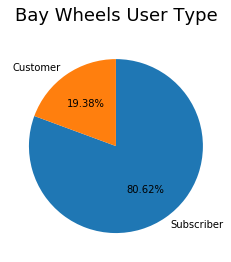

In [57]:
#Creating a pie chart to observe the distribution of customers vs. subscribers:
user_type = df_clean.user_type.value_counts()
plt.pie(user_type, labels = user_type.index, 
        startangle = 90, autopct= '%1.2f%%', counterclock = False, textprops={'color':'Black'});

plt.title('Bay Wheels User Type', y=1.05, fontsize=18);

## **Trip Duration by User Type**

Both of the charts produced show that there is a stronger preference for short rides, with the mode at around 5 minutes for subscribers, and 8 minutes for customers. A higher proportion of customers use the bikes for longer than 20 minutes. Our second chart, titled "Average Trip Duration", shows that customers spend nearly double the amount of time on a bike than subscribers (with an average of 22 minutes versus 11 minutes).

In [58]:
#Finally, our last comparative analysis of customers vs. subscribers will have to do with trip duration in minutes
colorr2 = sb.color_palette()[4]

#Setting trip time to less than or equal to 45 minutes (Bay Wheels' maximum allotted trip time)
cust_vs_sub_duration = df_clean.query('duration_mins <= 45')

#Setting conditions for plot
cust_vs_sub_duration_plot = sb.catplot(data=cust_vs_sub_duration, x = 'duration_mins', col='user_type',
                                       kind='count', sharey = False, color = colorr2, aspect=2)

cust_vs_sub_duration_plot.set_axis_labels('Duration (Minutes)', 'Trips Taken')
cust_vs_sub_duration_plot.set_titles('{col_name}')
cust_vs_sub_duration_plot.fig.suptitle('Customer vs. Subscribe Ride Duration', y=1.1, fontsize=18)
cust_vs_sub_duration_plot.set_xticklabels(rotation=90);

In [59]:
#Setting conditions for Average Trip duration plot
colors=['Teal', 'Purple']
axis = df_clean.groupby('user_type')['duration_mins'].mean().plot(kind='barh', color=colors, figsize=(12,4))

axis.set_title('Average Trip Duration: Customers vs. Subscribers', fontsize=18, y=1.1)
axis.set_ylabel('User Type', labelpad=14)
axis.set_xlabel('Duration (minutes)', labelpad=14);

## **Usage By Day of Week for each User Type**

This graph breaks down daily usage patterns by user type. Interestingly, demand stays relatuvely constant for customers on all days of the week (including the weekends). This is in stark contrast to subscribers, who clearly use the service far more for work commuting than customers given the dramatic drop in demand on weekends.

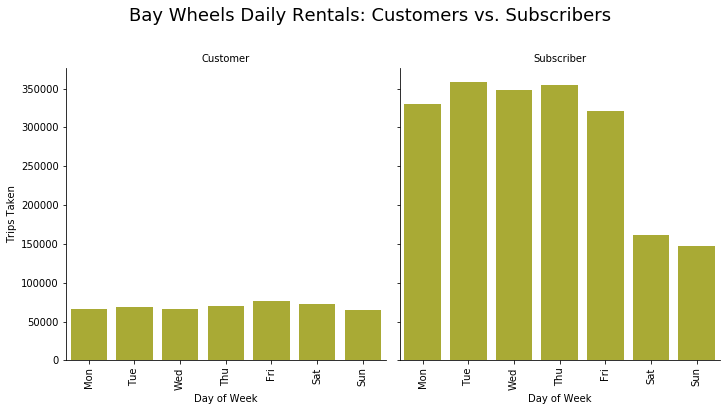

In [60]:
#Setting color and order we'd like for our graph
colorr1 = sb.color_palette()[8]
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

#Setting conditions for the plot
cust_vs_sub_day = sb.catplot(data=df_clean, x='start_dayofweek', col="user_type", kind='count', sharey = True, 
                              color = colorr1, order = weekday)

cust_vs_sub_day.set_axis_labels("Day of Week", "Trips Taken")
cust_vs_sub_day.set_titles("{col_name}")
cust_vs_sub_day.fig.suptitle('Bay Wheels Daily Rentals: Customers vs. Subscribers', y= 1.1, fontsize=18)
cust_vs_sub_day.set_xticklabels(rotation=90);

## **Monthly Usage by User Type**

The rate at which demand fluctuates is much higher for subscribers than it is for customers, as is demonstrated by the volatility of the orange line compared to the blue line. Demand visibily picks up during spring and summer for both user types, and drops significantly during winter months. 

We see a stark contrast in patterns for November and December, with subscriber demand dropping off dramatically and customer demand reaching its peak in December. This might suggest that holiday tourism increases demand for bike rentals in the Bay Area (among casual users), while subscribers either leave the Bay Area for the holidays, or do not use the service for workday commutes during this period of time.

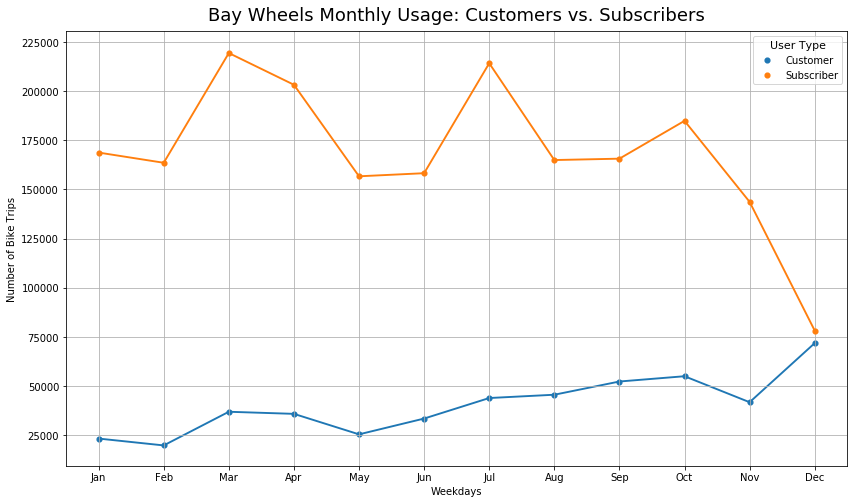

In [61]:
#We can also use a line chart to see what demand looks like on a monthly basis for both user types

plt.figure(figsize=(14, 8))
monthly = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

user_monthly_data = df_clean.groupby(['month', 'user_type']).size().reset_index()

user_monthly_line_chart = sb.pointplot(data=user_monthly_data, x='month', hue = 'user_type', y=0, scale=.7, 
                                      order = monthly)

plt.title('Bay Wheels Monthly Usage: Customers vs. Subscribers', y=1.01, fontsize=18)
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips')
axis = plt.gca()
legend = axis.legend()
legend.set_title('User Type',prop={'size':11})
plt.grid();

## **Weekday versus Hour Started for different User Types** 

**Subscribers**: The darkness that forms between 7am-10am and 5pm-7pm on weekdays is a clear sign that subscriber user traffic is primarily based around work-related daily commuting. Demand is far weaker during any other time on the graph, and we do not see high traffic on weekends compared to weekdays.

**Customers**: Demand is strongest around commuting hours, much like the subscriber map, but we see a softer contrast between rush-hour traffic and traffic between the hours of 10AM-4PM. Additionally, weekend traffic is quite strong, indicating that a larger proportion of customers use the service for leisure than subscribers.

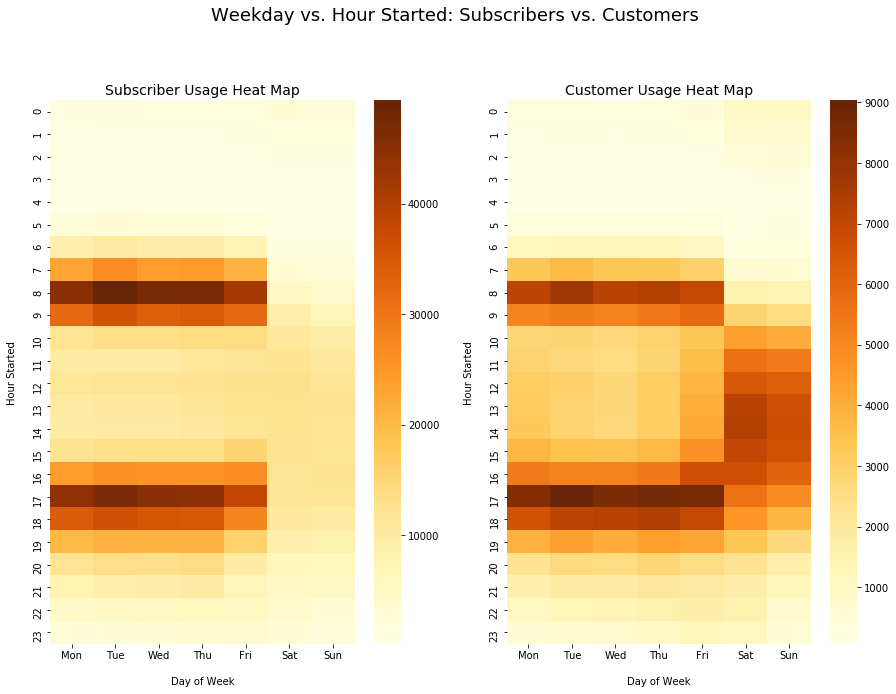

In [62]:
plt.figure(figsize=[15, 10])

#Subscriber Heat Map
plt.subplot(1,2,1)

sub_timedata = df_clean.query('user_type == "Subscriber"').groupby(['start_dayofweek',
                                                    'start_hourofday'])['bike_id'].size().reset_index()
sub_timedata['start_dayofweek'] = pd.Categorical(sub_timedata['start_dayofweek'],
                                     categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)
sub_timedata = sub_timedata.pivot('start_hourofday', 'start_dayofweek', 'bike_id')

sub_heatmap = sb.heatmap(sub_timedata, cmap = 'YlOrBr')

plt.title("Subscriber Usage Heat Map", y=1.4, fontsize=14)
plt.xlabel('Day of Week', labelpad = 16)
plt.ylabel('Hour Started', labelpad = 16);

#Customer Heat Map
plt.subplot(1,2,2)

cust_timedata = df_clean.query('user_type == "Customer"').groupby(['start_hourofday',
                                'start_dayofweek'])['bike_id'].size().reset_index()
cust_timedata['start_dayofweek'] = pd.Categorical(cust_timedata['start_dayofweek'],
                                     categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)
cust_timedata = cust_timedata.pivot('start_hourofday', 'start_dayofweek', 'bike_id')

sub_heatmap = sb.heatmap(cust_timedata, cmap = 'YlOrBr')

plt.title("Customer Usage Heat Map", y=1.4, fontsize=14)
plt.xlabel('Day of Week', labelpad = 16)
plt.ylabel('Hour Started', labelpad = 16);

plt.suptitle('Weekday vs. Hour Started: Subscribers vs. Customers', y = 1.01, fontsize = 18);

## **Summary**

The exploration of time-related data in this project has yielded interesting insights that can assist in the strategic development of Bay Wheels' operations. 

Our analysis showed that subscribers are most likely to use the service for their daily commuting needs, with most of their traffic centered around rush-hour during weekdays, with a dramatic decline in usage on the weekend and during holidays.

Customers also use the service for work commuting, but differ from subscribers in that their usage remains strong during weekday afternoons and weekends. This might indicate that a larger proportion of customers use the service for more leisurely purposes.



**Potential Opportunities**:
- The drop off in usage for both subscribers and customers in January, February and May could indicate a need for promotions that bolster tourism and stimulate ride usage.

- Bay Wheels could offer an incentive to get people using their bikes for non-commute related rides. An integration with fitness apps, calorie trackers, or more detailed trip summaries with health statistics could perhaps encourage people to use the service for exercise and leisure.


Overall, Bay Wheels provides an excellent green alternative to commuting by car, subway or bus. It is extremely accessible, and provides a great framework for other cities to follow in reduction of emmissions and transportation relief.